# Library 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [21]:
df=pd.read_csv('Heart attack.csv')

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1


In [23]:
df.shape

(9722, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   float64
 3   heart_disease      9722 non-null   float64
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   float64
 10  stroke             9722 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 835.6 KB


In [25]:
df.isnull().sum().sort_values(ascending = False).head(5)

gender           0
age              0
hypertension     0
heart_disease    0
ever_married     0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
X = my_scaler.fit_transform(X)

stroke        : 
 stroke
1    4861
0    4861
Name: count, dtype: int64


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


<Axes: title={'center': 'stroke'}, xlabel='stroke'>

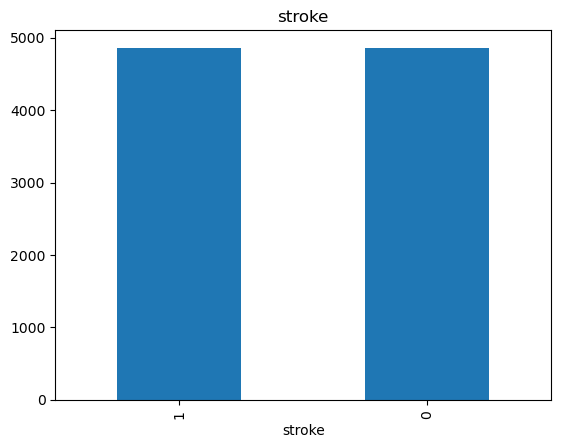

In [10]:
# Lets know how many values
print("stroke        : \n",y.value_counts())
print("\n")
print(y.value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
y.value_counts().plot.bar(title="stroke")


# Spliting Data 
### train test split

In [11]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [29]:
X_train.shape ,y_train.shape

((7777, 10), (7777,))

In [30]:
X_test.shape ,y_test.shape

((1945, 10), (1945,))

# Naïve Bayes 

In [40]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(X_train,y_train)
print('NBModel Train Score is : ',NBModel.score(X_train,y_train))
print('NBModel Test Score is : ',NBModel.score(X_test,y_test))

NBModel Train Score is :  0.637906647807638
NBModel Test Score is :  0.6442159383033419


In [41]:
y_pred=NBModel.predict(X_test)

In [42]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 1, 1]
predict output :  [1, 0, 0, 1, 0]


In [43]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[810, 163],
       [529, 443]], dtype=int64)

<Axes: >

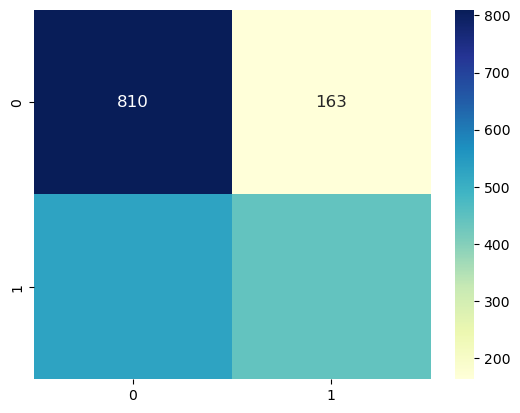

In [44]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="YlGnBu")

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       973
           1       0.73      0.46      0.56       972

    accuracy                           0.64      1945
   macro avg       0.67      0.64      0.63      1945
weighted avg       0.67      0.64      0.63      1945

